<a href="https://colab.research.google.com/github/ShivamD27/users/blob/main/1_Boston_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# from sklearn.datasets import load_boston/
import pandas as pd
import seaborn as sns
import

# boston_dataset = load_boston()

df = pd.read_csv('/content/HousingData.csv')

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

In [51]:
df = df.dropna()

In [52]:
df.shape

(394, 14)

In [53]:
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [35]:
correlation = df.corr()


<Axes: >

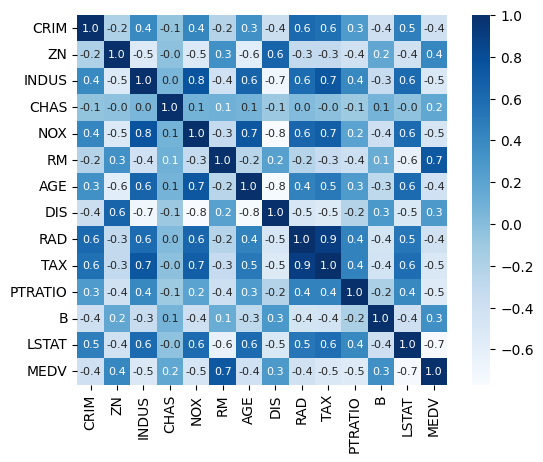

In [39]:
# plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar= True, square = True, fmt= '.1f', annot = True, annot_kws= {'size':8}, cmap='Blues')

In [ ]:
# If load_boston does not work then download the data and use this.
# Data : https://github.com/afnan47/sem8/blob/master/DL/1_boston_housing.csv
# import pandas as pd
# df = pd.read_csv("./1_boston_housing.csv")

In [54]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [56]:
X.columns

Index(['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'], dtype='object')

In [57]:
from sklearn.model_selection import train_test_split

# X = df[df.columns['INDUS','RM','PTRATIO','TAX','LSTAT']]
X = df.drop(['CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'B','MEDV'], axis = 1)
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [58]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [59]:
X_train.shape

(275, 5)

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(5, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               768       
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 9089 (35.50 KB)
Trainable params: 9089 (35.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 1)


Epoch 1/100
9/9 [==============================] - 1s 26ms/step - loss: 566.1090 - mae: 21.9427 - val_loss: 536.8289 - val_mae: 21.7025
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 540.6894 - mae: 21.3326 - val_loss: 507.6623 - val_mae: 20.9935
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 509.0347 - mae: 20.5233 - val_loss: 467.7259 - val_mae: 19.9755
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 465.4424 - mae: 19.3719 - val_loss: 413.6072 - val_mae: 18.4971
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 408.0445 - mae: 17.6985 - val_loss: 342.7809 - val_mae: 16.4189
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 336.3674 - mae: 15.5177 - val_loss: 261.6447 - val_mae: 13.9939
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 258.9601 - mae: 12.9313 - val_loss: 184.3167 - val_mae: 10.8945
Epoch 8/100
9/9 [==============================] - 0s 

In [64]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

4/4 [==============================] - 0s 4ms/step - loss: 18.6326 - mae: 2.9482
Mean squared error on test data:  18.632598876953125
Mean absolute error on test data:  2.948171377182007


PRACTICE WITH BUDS

In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [67]:
dff=pd.read_csv('/content/HousingData.csv')
dff.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [68]:
dff.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [71]:
dff = dff.dropna()

In [72]:
dff.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [79]:
hm = dff.corr()

<Axes: >

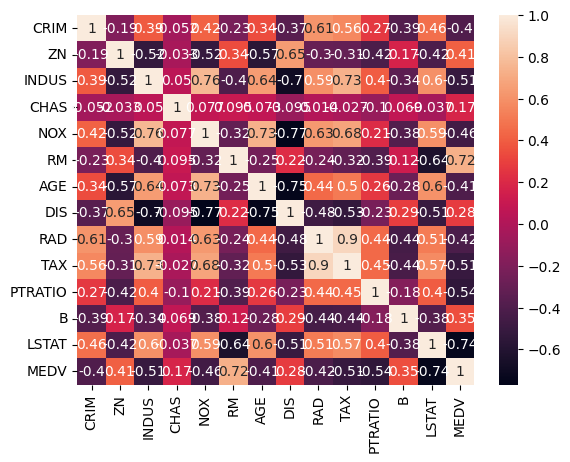

In [81]:
sns.heatmap(hm,annot=True)

In [82]:
dff.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [85]:
from sklearn.model_selection import train_test_split

X = dff.drop(['CHAS', 'NOX', 'AGE', 'DIS', 'B', 'MEDV'], axis=1)
Y = dff['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=13)

In [86]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit(X_train)

X_train = mms.transform(X_train)
X_test = mms.transform(X_test)



In [95]:
X_train.shape


(315, 8)

In [96]:
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(8, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               1152      
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9473 (37.00 KB)
Trainable params: 9473 (37.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
history = model.fit(X_train, Y_train, epochs=100, validation_split=0.05, verbose=1)

Epoch 1/100
10/10 [==============================] - 1s 22ms/step - loss: 574.4414 - mae: 22.0456 - val_loss: 433.7780 - val_mae: 19.2950
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 543.5562 - mae: 21.2703 - val_loss: 400.0051 - val_mae: 18.3137
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 497.0294 - mae: 20.0722 - val_loss: 349.2841 - val_mae: 16.7421
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 428.4153 - mae: 18.1771 - val_loss: 279.9008 - val_mae: 14.2702
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 339.6268 - mae: 15.5954 - val_loss: 200.6680 - val_mae: 10.8054
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 247.7602 - mae: 12.8408 - val_loss: 140.5942 - val_mae: 9.7756
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 183.3754 - mae: 11.0479 - val_loss: 125.2633 - val_mae: 9.7984
Epoch 8/100
10/10 [=======================

In [98]:
mse, mae = model.evaluate(X_test, Y_test)
print ('mae', mae)
print ('mse', mse)


3/3 [==============================] - 0s 7ms/step - loss: 7.2168 - mae: 2.0997
mae 7.216836452484131
mse 2.0997474193573
